# jupyter notebookでChainerを試すサンプル

## ライブラリのインポート

In [94]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import json

import chainer
import chainer.links as L
import chainer.functions  as F
from chainer import training
from chainer import optimizers
from chainer.training import extensions

import sys

plt.style.use('ggplot')

## データの取得

In [95]:
train, test = chainer.datasets.get_mnist()

## パラメータの設定

* batchsize: 確率的勾配降下法で学習させる際の１回分のバッチサイズ
* epoch: 学習の繰り返し回数
* units: 中間層の数
* gpu: GPUのid（CPUの場合は<0）
* choises: 出力の次元数

In [5]:
batchsize = 100
epoch   = 20
units   = 1000
gpu = -1
choises = 10

## ３層パーセプトロンモデル

In [97]:
class MnistModel(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MnistModel, self).__init__(
            l1=L.Linear(None, n_units),
            l2=L.Linear(None, n_units),
            l3=L.Linear(None, n_out),
        )

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

##  optimizerのセットアップ

In [98]:
model = L.Classifier(MnistModel(units,choises))
optimizer = optimizers.Adam()
optimizer.setup(model)

# 学習の開始

In [99]:
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,repeat=False, shuffle=False)

updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result')

trainer.extend(extensions.Evaluator(test_iter, model, device=gpu))

trainer.extend(extensions.snapshot(), trigger=(epoch, 'epoch'))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss','main/accuracy', 'validation/main/accuracy']))

trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
1           0.191573    0.095149              0.942017       0.97                      
2           0.0745474   0.114737              0.9766         0.9632                    
3           0.0487195   0.0722675             0.98475        0.979                     
4           0.0348205   0.0812639             0.9884         0.9779                    
5           0.0278007   0.0844082             0.991017       0.978                     
6           0.0262619   0.0873578             0.991233       0.9777                    
7           0.0215357   0.0728297             0.993117       0.9798                    
8           0.0175074   0.077078              0.9944         0.9815                    
9           0.0183737   0.0767149             0.9942         0.9808                    
10          0.0121802   0.0820749             0.9963         0.9814                    
11          0.0155267   0.0863105 

## グラフの描画

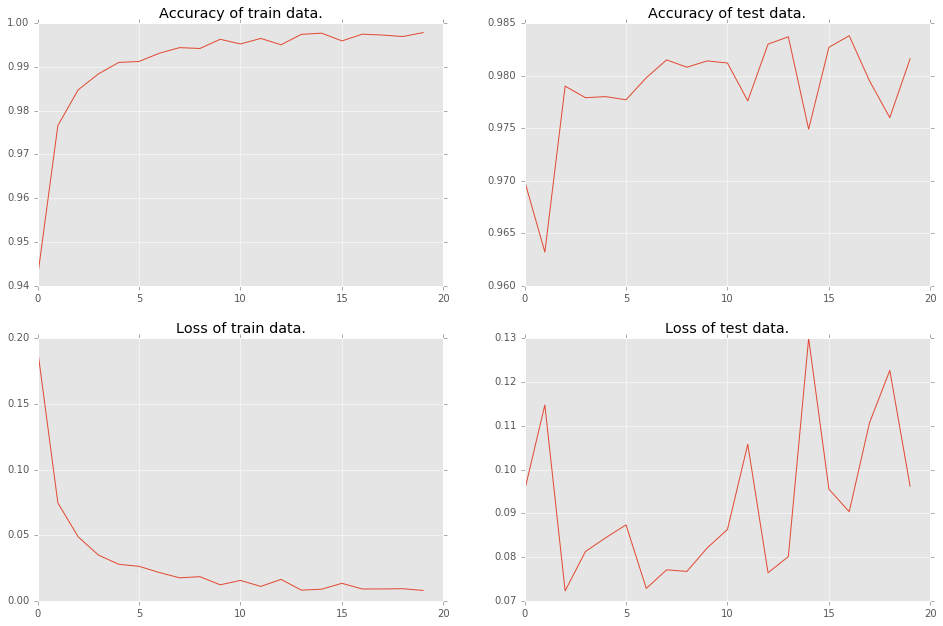

In [100]:
with open('result/log') as data_file:    
    data = json.load(data_file)
    
    plt.figure(figsize=(16,16))
    
    plt.subplot(3,2,1)
    plt.plot(range(len(data)), [d['main/accuracy'] for d in data])
    plt.title("Accuracy of train data.")
    
    plt.subplot(3,2,2)
    plt.plot(range(len(data)), [d['validation/main/accuracy'] for d in data])
    plt.title("Accuracy of test data.")
    
    plt.subplot(3,2,3)
    plt.plot(range(len(data)), [d['main/loss'] for d in data])
    plt.title("Loss of train data.")
    
    plt.subplot(3,2,4)
    plt.plot(range(len(data)), [d['validation/main/loss'] for d in data])
    plt.title("Loss of test data.")
    
    plt.show()



## 手書き数字データの描画

In [101]:
def draw_digit(data,n):
    size = 28
    
    plt.subplot(10,10,n)

    X, Y = np.meshgrid(range(size),range(size))
    Z = np.reshape(data,(size,size))
    Z = Z[::-1,:]
    plt.xlim(0,size-1)
    plt.ylim(0,size-1)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")  

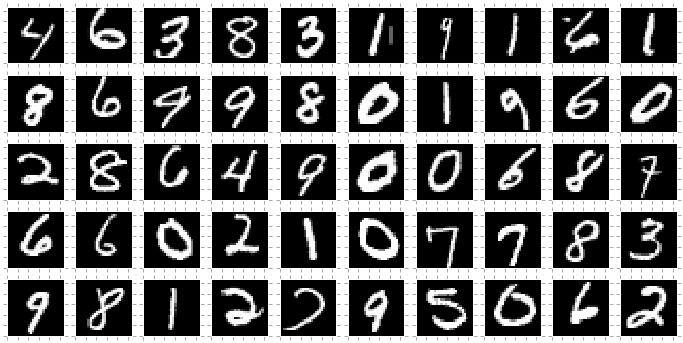

In [102]:
plt.figure(figsize=(12,12))

cnt = 1
for i in np.random.permutation(len(train))[:50]:
    draw_digit(train[i][0],cnt)
    cnt+=1
    
plt.show()